# Titanic Machine Learning from Disaster
- source: https://www.kaggle.com/competitions/titanic/overview

## 1.0 Data Dictionary
- source: https://www.kaggle.com/competitions/titanic/data

| Variable | Definition                                  | Key                                            |
| -------- | ------------------------------------------- | ---------------------------------------------- |
| survival | Survival                                    | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                                | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                         |                                                |
| Age      | Age in years                                |                                                |
| sibsp    | \# of siblings / spouses aboard the Titanic |                                                |
| parch    | \# of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                               |                                                |
| fare     | Passenger fare                              |                                                |
| cabin    | Cabin number                                |                                                |
| embarked | Port of Embarkation                         | C = Cherbourg, Q = Queenstown, S = Southampton |

<b> Variable Notes </b>

- <b> pclass </b>: A proxy for socio-economic status (SES)
   * 1st = Upper
   * 2nd = Middle
   * 3rd = Lower
   
- <b> age </b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- <b> sibsp </b>: The dataset defines family relations in this way...
- <b> Sibling </b> = brother, sister, stepbrother, stepsister
- <b> Spouse </b> = husband, wife (mistresses and fiancés were ignored)

- <b> parch </b>: The dataset defines family relations in this way...
- <b> Parent </b> = mother, father
- <b> Child </b> = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

## 1.1 Load Packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt

## 1.2 Load Data

In [3]:
# load training dataset
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# load test dataset
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 1.3 EDA - Exploratory Data Analysis

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print('--------------------------------------------')
print('Missing values in dataset i.e. NaN values')
print('--------------------------------------------')
values_missing = round(train_data.isna().sum())
perc_missing = round(train_data.isna().sum() / train_data.shape[0]*100, 2)
# sorted percentages of missing
df_missing = pd.DataFrame(values_missing, columns=['values_missing']).sort_values('values_missing', ascending=False)
df_missing['perc_nan'] = perc_missing
df_missing

--------------------------------------------
Missing values in dataset i.e. NaN values
--------------------------------------------


,values_missing,perc_nan
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [7]:
df_survived = train_data[['Survived', 'Sex']].groupby('Sex').sum()
df_survived['% of total'] = df_survived.apply(lambda x: round(x/df_survived['Survived'].sum()*100,2))
df_survived

,Survived,% of total
Sex,,
female,233,68.13
male,109,31.87


In [8]:
pd.crosstab(train_data['Sex'], train_data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [9]:
pd.crosstab(train_data['Sex'], train_data['Survived'], normalize='index').round(2)*100

Survived,0,1
Sex,,
female,26.0,74.0
male,81.0,19.0


<Figure size 1440x936 with 0 Axes>

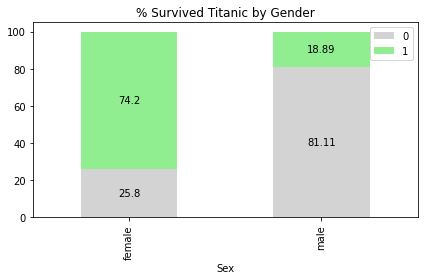

In [10]:
# define axis

plt.figure(figsize=(20,13))
ax = (pd.crosstab(train_data['Sex'], train_data['Survived'], normalize='index')*100)\
.round(2).plot.bar(stacked=True, 
                   title='% Survived Titanic by Gender', 
                   color=['lightgrey', 'lightgreen'])

# annotate the barchart labels in center
ax.bar_label(ax.containers[0], label_type='center')
ax.bar_label(ax.containers[1], label_type='center')

# set the legend position
plt.legend(loc = "upper right")

# set the layout to tight
plt.tight_layout()

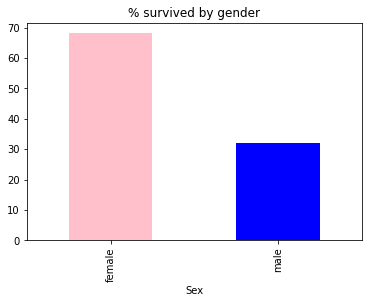

In [11]:


# show df
df_survived['% of total'].plot.bar(stacked=True, color=['pink', 'blue'], title='% survived by gender')
plt.show()

In [12]:
df_survived['Survived'].sum()

342

In [13]:
# check the missing values for age row-wise to validate
df_missing = train_data[train_data['Age'] != train_data['Age']]


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Feature Engineering
### feature: titles
- source: https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

In [15]:
import regex as re
def get_title(name):
    """
    Use a regular expression to search for a title.  Titles always consist of
    capital and lowercase letters, and end with a period.
    Takes a name as input and returns the title string as output
    """
    title_search = re.search('([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

In [16]:
train_data["Title"] = train_data["Name"].apply(get_title)  
#We dropped "Name" earlier. So, we use original data.
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [17]:
# see all unique names in training data
train_data["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

## Model - RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

# define dependent variable
y = train_data["Survived"]

# define list of features e.g. independent variables
features = ["Pclass", "Sex", "SibSp", "Parch"]

# create dummy variables from features of training set
X = pd.get_dummies(train_data[features])

# create dummy variables from features of test set
X_test = pd.get_dummies(test_data[features])

# define the model with the hyper-parameters
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# fit the model
model.fit(X, y)

# make the predictions
predictions = model.predict(X_test)

# create a pandas dataframe with the output of the predictions
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

# output to .csv file the prediction
output.to_csv('submission.csv', index=False)

# print user message that submission was succesfull 
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [19]:
# show output prediction of test_data of passengerId survived or not
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
